In [1]:
from keras_efficientnets import EfficientNetB0
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
from PIL import Image
import numpy as np 

In [2]:
base_layer = EfficientNetB0(include_top=False, 
                                        weights='imagenet', 
                                        input_shape=(224,224, 3))
model = base_layer.output
model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(5, activation='softmax')(model)
model = models.Model(base_layer.input, model)

model.compile(optimizer = Adam(lr=1e-3),
                loss='sparse_categorical_crossentropy',
                metrics=['acc']
                )

In [3]:
model.load_weights('../models/best_effnetB0.h5')

In [4]:
df = pd.read_csv('../input/train.csv')
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


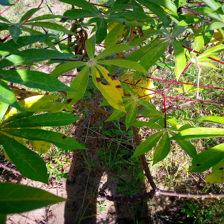

In [5]:
img = Image.open('../input/1000015157.jpg')
img = img.resize((224, 224))
img

In [6]:
img_tensor = tf.keras.preprocessing.image.img_to_array(
    img, data_format=None, dtype=None
).reshape(1,224,224,3)
img_tensor.shape

(1, 224, 224, 3)

In [7]:
result = model.predict(img_tensor)
np.argmax(result)

1

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('../models/best_effnetB0.tflite', 'wb') as f:
    f.write(tflite_model)

ConverterError: See console for info.
2021-04-01 21:05:52.108297: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:144] Ignored output_format.
2021-04-01 21:05:52.108331: W tensorflow/compiler/mlir/lite/python/graphdef_to_tfl_flatbuffer.cc:147] Ignored drop_control_dependency.
2021-04-01 21:05:52.161670: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-04-01 21:05:52.183063: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2799925000 Hz
2021-04-01 21:05:52.183290: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55859148b820 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-04-01 21:05:52.183307: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-04-01 21:05:52.183886: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-04-01 21:05:52.187942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.188126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2021-04-01 21:05:52.188260: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-04-01 21:05:52.189241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-04-01 21:05:52.190228: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-04-01 21:05:52.190397: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-04-01 21:05:52.191380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2021-04-01 21:05:52.191861: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2021-04-01 21:05:52.193920: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-04-01 21:05:52.194005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.194230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.194379: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1703] Adding visible gpu devices: 0
2021-04-01 21:05:52.194408: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-04-01 21:05:52.228806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-04-01 21:05:52.228831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1108]      0 
2021-04-01 21:05:52.228837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1121] 0:   N 
2021-04-01 21:05:52.228960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.229169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.229355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-01 21:05:52.229522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1247] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 176 MB memory) -> physical GPU (device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1)
2021-04-01 21:05:52.230753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5585903d0b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-04-01 21:05:52.230766: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce GTX 1060 6GB, Compute Capability 6.1
2021-04-01 21:05:52.237759: I tensorflow/stream_executor/cuda/cuda_driver.cc:763] failed to allocate 176.56M (185139200 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-04-01 21:05:52.238077: I tensorflow/stream_executor/cuda/cuda_driver.cc:763] failed to allocate 158.91M (166625280 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-04-01 21:05:52.266603: F ./tensorflow/core/kernels/conv_2d_gpu.h:659] Non-OK-status: GpuLaunchKernel( SwapDimension1And2InTensor3UsingTiles<T, NumThreads, TileLongSide, TileShortSide>, total_tiles_count, NumThreads, 0, d.stream(), input, input_dims, output) status: Internal: out of memory
Fatal Python error: Aborted

Current thread 0x00007f98d190f740 (most recent call first):
  File "/home/anandsm/miniconda3/envs/tfgpu/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 50 in execute
  File "/home/anandsm/miniconda3/envs/tfgpu/lib/python3.8/site-packages/absl/app.py", line 251 in _run_main
  File "/home/anandsm/miniconda3/envs/tfgpu/lib/python3.8/site-packages/absl/app.py", line 303 in run
  File "/home/anandsm/miniconda3/envs/tfgpu/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 40 in run
  File "/home/anandsm/miniconda3/envs/tfgpu/lib/python3.8/site-packages/tensorflow/lite/toco/python/toco_from_protos.py", line 93 in main
  File "/home/anandsm/miniconda3/envs/tfgpu/bin/toco_from_protos", line 11 in <module>


